In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

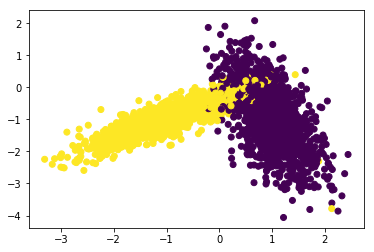

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [ ]:
from sklearn.metrics import accuracy_score
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = []  
    
    #generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    params=random.sample(range(param_range[0],param_range[1]), 10)
    params.sort() #sorting the params in order to get the data in increasing order
    
    
    #divide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
    #  group 1: 0-33, group 2:34-66, group 3: 67-100
    x=[]
    for i in range(0,len(x_train)+1,len(x_train)//fold):
        x.append(i)
    x[len(x)-1]=len(x_train)
    
    
    for p in params:
        trainscores_folds = []
        testscores_folds  = []
        for i in range(0,len(x)-1,1):
            start=x[i]
            end=x[i+1]
           
            #loading the data into xtrain and xtest
            data_train_x=x_train
            data_cross_x=x_train
    
            xtrain=np.delete(data_train_x,np.arange(start,end+1,1),0) 
            xtest=data_cross_x[start:end+1,:]
            
            #loading the data into ytrain and ytest
            data_train_y=y_train
            data_cross_y=y_train
    
            ytrain=np.delete(data_train_y,np.arange(start,end+1,1),0) 
            ytest=data_cross_y[start:end+1] 
            
            #initializing the k value here I used p
            classifier.n_neighbors = p
            
            #fitting the model with value using xtrain and ytrain
            classifier.fit(xtrain,ytrain)
            
            #predicting the testscores
            ypredicted = classifier.predict(xtest)
            testscores_folds.append(accuracy_score(ytest, ypredicted))
             
            #predicting the train scores
            ypredicted = classifier.predict(xtrain)
            trainscores_folds.append(accuracy_score(ytrain, ypredicted))
        
        #appending the train and test score means
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
        
    return params,trainscores,testscores   
    

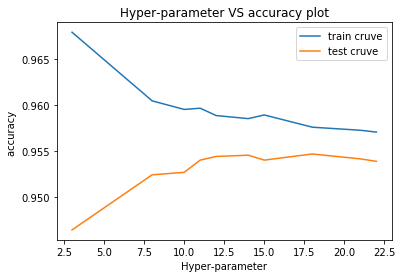

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = (3,23)
folds = 3

params,trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
 
params = {'n_neighbors':params}

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel('Hyper-parameter')
plt.ylabel('accuracy ')
plt.legend()
plt.show()

In [ ]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

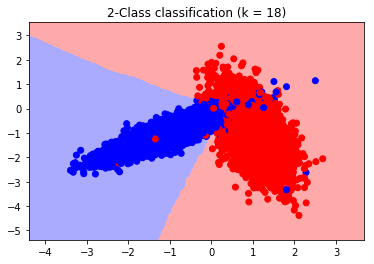

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 18)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)